<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/blockchain/blockchain_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build A Blockchain In < 60 Lines of Code

Learn Bitcoin’s underlying data structure in 4 short steps

What is a blockchain? 

A blockchain is open-source software that is shared between thousands of computers. These computers all follow a set of rules to track money that’s been sent from accounts tied to the blockchain software.

Each “block” is a group of data that says, for example, “Alice paid Bob $100 on Monday, February 15th.” On the blockchain, I can send you money without using a bank!

For this project you’ll only need Python. Keep in mind, our blockchain will be a simplified, high-level introduction…we won’t build the full-blown Bitcoin blockchain. Instead we’ll create functions to add blocks, transactions, and encryption so that our data’s tamper-proof.



## Step 1: Create a Blockchain Class

In [1]:
import hashlib
import json
from time import time

class Blockchain(object):
    def __init__(self):
        self.chain = []
        self.pending_transactions = []

        self.new_block(previous_hash="The Times 03/Jan/2009 Chancellor on brink of second bailout for banks.", proof=100)


First step: imports! We’ll need hashlib for the encryption, JSON to format our blocks, and time for each block’s timestamp.

Since we’ll be writing this with object-oriented programming in mind, let’s create a **Blockchain** class and initialize the following variables:

**chain:** an empty list that we’ll add blocks to. Quite literally our ‘block-chain’.

**pending_transactions:** when users send our coins to each other, their transactions will sit in this array until we approve & add them to a new block.

**new_block:** this is a method that we’ll define soon, and we’ll use it to add each block to the chain. Let’s borrow Satoshi’s message from the Bitcoin genesis block (the very first block ever mined) for inspiration :)

##Step 2: Write a Function to Build New Blocks

In [3]:
# Create a new block listing key/value pairs of block information in a JSON object. Reset the list of pending transactions & append the newest block to the chain.

def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.pending_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        self.pending_transactions = []
        self.chain.append(block)

        return block

Now that we have an empty chain, let’s add blocks to it! On ```block = {```  we’ll add a block variable describing a JSON object with these properties:

**index:** Take the length of our blockchain and add 1 to it. We’ll use this to reference an individual block, so for example the genesis block has index = 1

**timestamp:** using our time() import, stamp the block when it’s created. Users can now check when their transaction was confirmed on-chain.

**transactions:** any transactions that are sitting in the ‘pending’ list will be included in our new block.

**proof:** this comes from our miner who thinks they found a valid “nonce”, or “proof”. We’ll talk about this some more in a bit.

**previous_hash:** a hashed version of the most recent approved block.

Ok, so every new block will contain those properties, and that’s all well and good, but we still need to add it to the chain! Lines ```self.pending_transactions = []``` & ```self.chain.append(block)```  will take care of this: first we empty the pending list of transactions (since we added them to our new block on ```block = {```), then add our new block to self.chain and return it.

##Step 3: Write Functions to Create New Transactions & Get the Last Block

In [8]:
#Search the blockchain for the most recent block.

@property
def last_block(self):
 
        return self.chain[-1]

# Add a transaction with relevant info to the 'blockpool' - list of pending tx's. 

def new_transaction(self, sender, recipient, amount):
        transaction = {
            'sender': sender,
            'recipient': recipient,
            'amount': amount
        }
        self.pending_transactions.append(transaction)
        return self.last_block['index'] + 1


Without a list of transactions (ie. “Mike sent 1 BTC to reader”) this whole exercise is pretty pointless. Let’s first define a last_block() method, so that we can call our chain and receive the block that was added most recently (we’ll use this in a second for our new index).

Now let’s create a new_transaction() method with our three most important variables: sender, recipient, and amount. Without these included in each and every transaction, our users can’t spend, earn, or buy things with our newly-minted cryptocurrency! Just keep in mind that our transactions today are over-simplified, and don’t reflect what you’d find in a true cryptocurrency.

On ```self.pending_transactions.append(transaction)``` we add our transaction JSON object to our pool of pending_transactions. These will sit in limbo until a new block is mined and added to our blockchain. And for future reference, let’s return the index of the block which our new transaction’s going to be added to.



## Step 4: Write a Function to “Hash” Our Blocks

In [9]:
# receive one block. Turn it into a string, turn that into Unicode (for hashing). Hash with SHA256 encryption, then translate the Unicode into a hexidecimal string.

def hash(self, block):
        string_object = json.dumps(block, sort_keys=True)
        block_string = string_object.encode()

        raw_hash = hashlib.sha256(block_string)
        hex_hash = raw_hash.hexdigest()

        return hex_hash

Bitcoin and many other blockchains use SHA-256, an encryption hash function, which takes in some text string (stored as a Unicode value) and spits out a 64-character long encrypted string. In a blockchain, the text that we encrypt is actually our block. For example, the encrypted string, or “hash”, of the Bitcoin genesis block looks like this:

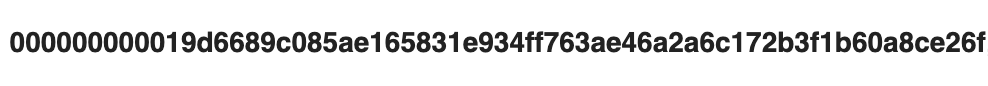

Why do we care? Blockchains are considered “tamper-proof” because every single block contains a copy of the previous block’s hash. And since your new hash is derived from the previous block, you can’t change any aspect of a block without changing every single hash in front of it.

If I wanted to, I could download the Bitcoin blockchain to my computer, write “Satoshi sends Mike 7,235,900 Bitcoin!” into the genesis block, and broadcast this to the Bitcoin network and claim that I’m a secret billionaire. But as soon as any self-respecting miner compares their current copy of the blockchain, specifically the hash values stored in each block, with my copy of the chain, they’ll see that I’m a liar, refuse to validate it, and run me off the network.

Let’s look back at our code. Our hash() method on line 48 takes our new block and changes its key/value pairs all into strings. ```block_string = string_object.encode()``` urns that string into Unicode, which we pass into our SHA256 method from hashlib, and we create a hexidecimal string from its return value. Then we return our new hash.

### Step 5: Create a new Blockchain & Send Some Money!

In [12]:
'''
blockchain = Blockchain()
t1 = blockchain.new_transaction("Satoshi", "Mike", '5 BTC')
t2 = blockchain.new_transaction("Mike", "Satoshi", '1 BTC')
t3 = blockchain.new_transaction("Satoshi", "Hal Finney", '5 BTC')
blockchain.new_block(12345)

t4 = blockchain.new_transaction("Mike", "Alice", '1 BTC')
t5 = blockchain.new_transaction("Alice", "Bob", '0.5 BTC')
t6 = blockchain.new_transaction("Bob", "Mike", '0.5 BTC')
blockchain.new_block(6789)

print("Genesis block: ", blockchain.chain)
'''

'\nblockchain = Blockchain()\nt1 = blockchain.new_transaction("Satoshi", "Mike", \'5 BTC\')\nt2 = blockchain.new_transaction("Mike", "Satoshi", \'1 BTC\')\nt3 = blockchain.new_transaction("Satoshi", "Hal Finney", \'5 BTC\')\nblockchain.new_block(12345)\n\nt4 = blockchain.new_transaction("Mike", "Alice", \'1 BTC\')\nt5 = blockchain.new_transaction("Alice", "Bob", \'0.5 BTC\')\nt6 = blockchain.new_transaction("Bob", "Mike", \'0.5 BTC\')\nblockchain.new_block(6789)\n\nprint("Genesis block: ", blockchain.chain)\n'

Let’s recap how much we’ve done. First, we created a class for our blockchain. Next, we wrote methods to build a new block and a new transaction, along with a custom method used to hash any block with SHA256 encryption.

So let’s build our chain! We initialize an instance of our Blockchain class on ```blockchain = Blockchain()```. Then we add some dummy transactions, making sure to list them in some blocks that we add to our chain. All that’s left is to save the above lines of code into your text editor & run the file in your terminal.

Here’s our result:

In [11]:
import hashlib
import json
from time import time

class Blockchain(object):
    def __init__(self):
        self.chain = []
        self.pending_transactions = []

        self.new_block(previous_hash="The Times 03/Jan/2009 Chancellor on brink of second bailout for banks.", proof=100)

# Create a new block listing key/value pairs of block information in a JSON object. Reset the list of pending transactions & append the newest block to the chain.

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.pending_transactions,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        self.pending_transactions = []
        self.chain.append(block)

        return block

#Search the blockchain for the most recent block.

    @property
    def last_block(self):
 
        return self.chain[-1]

# Add a transaction with relevant info to the 'blockpool' - list of pending tx's. 

    def new_transaction(self, sender, recipient, amount):
        transaction = {
            'sender': sender,
            'recipient': recipient,
            'amount': amount
        }
        self.pending_transactions.append(transaction)
        return self.last_block['index'] + 1

# receive one block. Turn it into a string, turn that into Unicode (for hashing). Hash with SHA256 encryption, then translate the Unicode into a hexidecimal string.

    def hash(self, block):
        string_object = json.dumps(block, sort_keys=True)
        block_string = string_object.encode()

        raw_hash = hashlib.sha256(block_string)
        hex_hash = raw_hash.hexdigest()

        return hex_hash


blockchain = Blockchain()
t1 = blockchain.new_transaction("Satoshi", "Mike", '5 BTC')
t2 = blockchain.new_transaction("Mike", "Satoshi", '1 BTC')
t3 = blockchain.new_transaction("Satoshi", "Hal Finney", '5 BTC')
blockchain.new_block(12345)

t4 = blockchain.new_transaction("Mike", "Alice", '1 BTC')
t5 = blockchain.new_transaction("Alice", "Bob", '0.5 BTC')
t6 = blockchain.new_transaction("Bob", "Mike", '0.5 BTC')
blockchain.new_block(6789)

print("Genesis block: ", blockchain.chain)

Genesis block:  [{'index': 1, 'timestamp': 1653323833.3587966, 'transactions': [], 'proof': 100, 'previous_hash': 'The Times 03/Jan/2009 Chancellor on brink of second bailout for banks.'}, {'index': 2, 'timestamp': 1653323833.3588758, 'transactions': [{'sender': 'Satoshi', 'recipient': 'Mike', 'amount': '5 BTC'}, {'sender': 'Mike', 'recipient': 'Satoshi', 'amount': '1 BTC'}, {'sender': 'Satoshi', 'recipient': 'Hal Finney', 'amount': '5 BTC'}], 'proof': 12345, 'previous_hash': '759678b74721f89040c30b2c42979fb446ac8b1c80c5ebbd4cf62f07c39e1417'}, {'index': 3, 'timestamp': 1653323833.3589942, 'transactions': [{'sender': 'Mike', 'recipient': 'Alice', 'amount': '1 BTC'}, {'sender': 'Alice', 'recipient': 'Bob', 'amount': '0.5 BTC'}, {'sender': 'Bob', 'recipient': 'Mike', 'amount': '0.5 BTC'}], 'proof': 6789, 'previous_hash': '960e1a9d62a692bad2d5e1121d2aa9f0a046e3c76d28c60366cff4b3a3d7c436'}]


Our blockchain includes 3 blocks right now: the genesis block (with an index of 1 and no transactions), plus the 2 that we added ourselves. 

One more thing: do you notice any account balances?

Blockchains != banks and here’s a good example of the difference. A cryptocurrency wallet will calculate your balance by scanning the entire chain and adding up how many coins you received vs. how much you spent. 